# Analytic Report project

In [1]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Cardiology.xls', sheetname='Sheet1')
data.head(20)

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximu heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0
5,58,0,1,150,283,1,2,162,0,1.0,1,0,3,1
6,58,1,2,120,284,0,2,160,0,1.8,2,0,3,0
7,58,1,3,132,224,0,2,173,0,3.2,1,2,7,0
8,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1
9,67,1,4,160,286,0,2,108,1,1.5,2,3,3,0


In [3]:
data = data[['age', 'sex', 'blood pressure', 'cholesterol','class']]
data.describe()

,age,sex,blood pressure,cholesterol,class
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


# 1. How does blood pressure and cholesterol relate to each other?

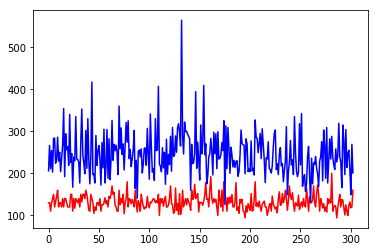

Hệ số tương quan giữa blood presure và cholesterol : 0.12317420653239071


In [9]:
blood_pressure = data['blood pressure']
cholesterol = data['cholesterol']
plt.plot(blood_pressure, "red")
plt.plot(cholesterol, "blue")
plt.show()
print('Hệ số tương quan giữa blood presure và cholesterol : {}' .format(blood_pressure.corr(cholesterol)))

Vậy sự tương quan giữa blood presure và cholesterol là tương đối thấp

# 2.Do men tend to have higher blood pressure than women? What about cholesterol?
## 2.1 Blood pressure:
- Null hypothesis: Men don't tend to have higher blood pressure than women.
- Alternative hypothesis: Men tend to have higher blood pressure than women.

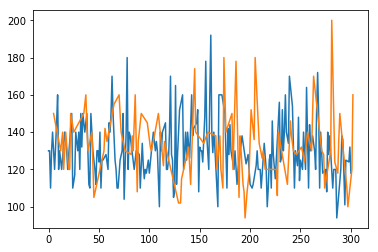

p_value = 0.3246834797221041


In [12]:
men = data[data['sex']== 1]    
women = data[data['sex']== 0]

plt.plot(men['blood pressure'])
plt.plot(women['blood pressure'])
plt.show()

result_bp = ttest_ind(men['blood pressure'],women['blood pressure'])
print('p_value = {}' .format(result_bp.pvalue))

Vì p_value > 0.1 nên không thể kết luận rằng nam giới có xu hướng blood pressure  cao hơn phụ nữ.

## 2.1 Cholesterol:
- Null hypothesis: Men don't tend to have higher cholesterol than women.
- Alternative hypothesis: Men tend to have higher cholesterol than women.

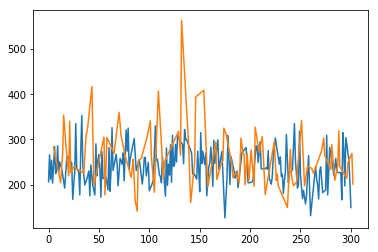

p_value = 0.000529966610622664


In [14]:
plt.plot(men['cholesterol'])
plt.plot(women['cholesterol'])
plt.show()

result_chol = ttest_ind(men['cholesterol'],women['cholesterol'])
print('p_value = {}' .format(result_chol.pvalue))

Vì p_value < 0.01 nên có thể kết luận rằng nam giới có xu hướng cholesterol cao hơn phụ nữ.

# 3.What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (men and women)?
## 3.1 Age:
- Null hypothesis: Age doesn't cause heart disease.
- Alternative hypothesis: Age causes heart disease.

In [18]:
men_age_heart_disease = ttest_ind(data['age'][data['sex'] == 1][data['class']==1], 
                                  data['age'][data['sex'] == 1][data['class']==0]).pvalue
print('pvalue in age case of men: {} '.format(men_age_heart_disease))

pvalue in age case of men: 2.102442577307712e-05 


In [19]:
women_age_heart_disease = ttest_ind(data['age'][data['sex'] == 0][data['class']==1], 
                                    data['age'][data['sex'] == 0][data['class']==0]).pvalue
print('pvalue in age case of women: {} '.format(women_age_heart_disease))

pvalue in age case of women: 0.042469631102719105 


Từ 2 kết quả p_value ở trên ta có thể kết luận rằng tuổi gây ra bệnh tim cho cả nam lẫn nữ.

## 3.2 Blood pressure:
- Null hypothesis:  Blood pressure don't cause heart disease.
- Alternative hypothesis: Blood pressure cause heart disease.

In [21]:
men_pressure_heart_disease = ttest_ind(data['blood pressure'][data['sex'] == 1][data['class']==1], 
                                       data['blood pressure'][data['sex'] == 1][data['class']==0]).pvalue
print('pvalue in blood pressure case of men: {} '.format(men_pressure_heart_disease))

women_pressure_heart_disease = ttest_ind(data['blood pressure'][data['sex'] == 0][data['class']==1], 
                                       data['blood pressure'][data['sex'] == 0][data['class']==0]).pvalue
print('pvalue in blood pressure case of women: {}' .format(women_pressure_heart_disease))

pvalue in blood pressure case of men: 0.3484860467059646 
pvalue in blood pressure case of women: 7.837377824823497e-05


Từ 2 kết quả p_value ở trên ta có thể kết luận rằng blood pressure chỉ gây ra cho nữ không ảnh hưởng tới nam.

## 3.3 Cholesterol:
- Null hypothesis:  Cholesterol don't cause heart disease.
- Alternative hypothesis: Cholesterol cause heart disease.

In [23]:
men_cholesterol_heart_disease = ttest_ind(data['cholesterol'][data['sex'] == 1][data['class']==1], 
                                          data['cholesterol'][data['sex'] == 1][data['class']==0]).pvalue
print('pvalue in cholesterol case of men: {} '.format(men_cholesterol_heart_disease))

women_cholesterol_heart_disease = ttest_ind(data['cholesterol'][data['sex'] == 0][data['class']==1], 
                                          data['cholesterol'][data['sex'] == 0][data['class']==0]).pvalue
print('pvalue in cholesterol case of women: {} '.format(women_cholesterol_heart_disease))

pvalue in cholesterol case of men: 0.011348054524752035 
pvalue in cholesterol case of women: 0.2372594614368495 


Từ 2 kết quả p_value ở trên ta có thể kết luận rằng cholesterol  chỉ gây ra cho nam không ảnh hưởng tới nữ.

# Kết Luận:
## 1.
    - sự tương quan giữa blood presure và cholesterol là tương đối thấp
## 2. 
    - nam giới có xu hướng blood pressure  cao hơn phụ nữ.
    - nam giới có xu hướng cholesterol cao hơn phụ nữ.
## 3.
    - Tuổi gây ra bệnh tim cho cả nam lẫn nữ.
    - Blood pressure chỉ gây ra cho nữ không ảnh hưởng tới nam
    - Cholesterol  chỉ gây ra cho nam không ảnh hưởng tới nữ